# Baseline

## Carrega de dades i llibreries

In [1]:
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2

# No volem gaires warnings
import warnings 
warnings.filterwarnings("ignore")

# Importem panda, numpy i seaborn
import pandas as pd
pd.options.display.max_rows = 999

import numpy as np
import seaborn as sb
sb.set(style="white", color_codes=True)

# També matplotlib, important per a fer gràfiques
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import glob

# Afegim Columnes

columns = [ 'id',
            'lliga',
            'temp',
            'temp_id',
            'date',
            'hour',
            'round',
            'result',
            'localId',
            'local_goals',
            'local_wins',
            'local_losses',
            'local_draws',
            'local_ga',
            'local_gf',
            'local_avg',
            'local_mark',
            'local_points',
            'visitorId',
            'visitor_goals',
            'visitor_wins',
            'visitor_losses',
            'visitor_draws',
            'visitor_ga',
            'visitor_gf',
            'visitor_avg',
            'visitor_mark',
            'visitor_points'
]

full_data_set = pd.DataFrame(columns=columns)

# Carreguem el fitxer de l'aproximació 1 (en aquest cas no fa falta concatenarlo amb cap més)
for fname in glob.glob("../TF_data/0-baseline.csv"):
    print ('Processing', fname)
    df = pd.read_csv(fname, 
                     sep=";", 
                     header=1,
                     names= columns,
                     na_values=['?'])

    df.set_index(keys = 'id', inplace = True)
    full_data_set = pd.concat([full_data_set, df],axis=0)
# Establim l'index    
    full_data_set['id'] = full_data_set.index
# I les dates com a datetime    
    full_data_set['date'] = pd.to_datetime(full_data_set.date)

print('Finished')

print 'Total', full_data_set.shape[0], 'partits'


Populating the interactive namespace from numpy and matplotlib
('Processing', '../TF_data/0-baseline.csv')
Finished
Total 2510 partits


## Análisis i manipulació de les dades

In [2]:
# Plot de les dades, observem les distrucións (ens fixem sempre en la variable 'result' que es el nostre objectiu)
#sb.pairplot(full_data_set.dropna(), hue='result')

In [3]:
full_data_set.describe(include='all').T

count unique                  top freq                first  \
date            2510    446  2014-05-02 22:00:00   20  2012-08-17 22:00:00   
hour            2510    NaN                  NaN  NaN                  NaN   
id              2510    NaN                  NaN  NaN                  NaN   
lliga           2510    NaN                  NaN  NaN                  NaN   
localId         2510    NaN                  NaN  NaN                  NaN   
local_avg       2443    NaN                  NaN  NaN                  NaN   
local_draws     2443    NaN                  NaN  NaN                  NaN   
local_ga        2443    NaN                  NaN  NaN                  NaN   
local_gf        2443    NaN                  NaN  NaN                  NaN   
local_goals     2510    NaN                  NaN  NaN                  NaN   
local_losses    2443    NaN                  NaN  NaN                  NaN   
local_mark      2443    NaN                  NaN  NaN                  NaN   
local_points    2443    NaN                  NaN  NaN                  NaN   
local_wins      2443    NaN                  NaN  NaN                  NaN   
result          2510    NaN                  NaN  NaN                  NaN   
round           2510    NaN                  NaN  NaN                  NaN   
temp            2510    NaN                  NaN  NaN                  NaN   
temp_id         2510    NaN                  NaN  NaN                  NaN   
visitorId       2510    NaN                  NaN  NaN                  NaN   
visitor_avg     2443    NaN                  NaN  NaN                  NaN   
visitor_draws   2443    NaN                  NaN  NaN                  NaN   
visitor_ga      2443    NaN                  NaN  NaN                  NaN   
visitor_gf      2443    NaN                  NaN  NaN                  NaN   
visitor_goals   2510    NaN                  NaN  NaN                  NaN   
visitor_losses  2443    NaN                  NaN  NaN                  NaN   
visitor_mark    2443    NaN                  NaN  NaN                  NaN   
visitor_points  2443    NaN                  NaN  NaN                  NaN   
visitor_wins    2443    NaN                  NaN  NaN                  NaN   

                               last      mean       std   min     25%     50%  \
date            2015-05-23 22:00:00       NaN       NaN   NaN     NaN     NaN   
hour                            NaN   17.5203   2.70913    12      15      17   
id                              NaN   1258.56   725.974     2  630.25  1258.5   
lliga                           NaN   5.43187   4.10348     1       1       8   
localId                         NaN   29.5382    19.228     1      12      27   
local_avg                       NaN -0.225952   17.2654   -45     -10      -2   
local_draws                     NaN   4.35284   3.04322     0       2       4   
local_ga                        NaN   25.8158   16.3884     0      12      24   
local_gf                        NaN   25.5898   18.6206     0      11      23   
local_goals                     NaN   1.60199    1.3796     0       1       1   
local_losses                    NaN   7.12853   5.16492     0       3       6   
local_mark                      NaN   1.45927   1.87189     0       0       0   
local_points                    NaN   25.4261   17.9456     0      11      22   
local_wins                      NaN   7.03152   5.58233     0       3       6   
result                          NaN   1.07012  0.725238     0       1       1   
round                           NaN   19.0187   10.7306     1      10      19   
temp                            NaN   2014.27  0.707801  2013    2014    2014   
temp_id                         NaN   2.27371  0.707801     1       2       2   
visitorId                       NaN   29.5327   19.2333     1      12      27   
visitor_avg                     NaN  0.217765   17.0954   -43      -9      -2   
visitor_draws                   NaN    4.3598   3.0

In [4]:
#Eliminem les dades que no podrem reproduir
full_data_set = full_data_set.drop('id', 1)
full_data_set = full_data_set.drop('date', 1)
full_data_set = full_data_set.drop('local_mark', 1)
full_data_set = full_data_set.drop('visitor_mark', 1)

full_data_set = full_data_set.drop('visitor_goals', 1)
full_data_set = full_data_set.drop('local_goals', 1)

In [5]:
#Num de features amb les que jugarem
full_data_set.columns.size

22

In [6]:
#Comprovem els tipus, haurien de ser tot numerals
for col in full_data_set:
    print col,'\t\t\t\t', full_data_set[col].dtypes

hour 				float64
lliga 				float64
localId 				float64
local_avg 				float64
local_draws 				float64
local_ga 				float64
local_gf 				float64
local_losses 				float64
local_points 				float64
local_wins 				float64
result 				float64
round 				float64
temp 				float64
temp_id 				float64
visitorId 				float64
visitor_avg 				float64
visitor_draws 				float64
visitor_ga 				float64
visitor_gf 				float64
visitor_losses 				float64
visitor_points 				float64
visitor_wins 				float64


In [7]:
#Hi han nulls??
full_data_set.isnull().any().any()

True

In [8]:
# Els reemplaçem per 0 (només son de resultats de jornades anteriors. Per exemple quan no n'hi ha cap!, jornada1)
full_data_set = full_data_set.fillna(0)

In [9]:
#Hi han nulls 2??
full_data_set.isnull().any().any()

False

In [10]:
#Observem que totes les dades semblen raonables (i tenen una distribució mes o menys raonable)
full_data_set.describe(include='all').T

count         mean        std     min      25%     50%  \
hour            2510.0    17.520319   2.709126    12.0    15.00    17.0   
lliga           2510.0     5.431873   4.103477     1.0     1.00     8.0   
localId         2510.0    29.538247  19.227963     1.0    12.00    27.0   
local_avg       2510.0    -0.219920  17.033395   -45.0    -9.00    -2.0   
local_draws     2510.0     4.236653   3.083237     0.0     2.00     4.0   
local_ga        2510.0    25.126693  16.695187     0.0    11.00    24.0   
local_gf        2510.0    24.906773  18.827807     0.0    11.00    22.0   
local_losses    2510.0     6.938247   5.223480     0.0     3.00     6.0   
local_points    2510.0    24.747410  18.172723     0.0    10.00    22.0   
local_wins      2510.0     6.843825   5.622748     0.0     3.00     6.0   
result          2510.0     1.070120   0.725238     0.0     1.00     1.0   
round           2510.0    19.018725  10.730551     1.0    10.00    19.0   
temp            2510.0  2014.273705   0.707801  2013.0  2014.00  2014.0   
temp_id         2510.0     2.273705   0.707801     1.0     2.00     2.0   
visitorId       2510.0    29.532669  19.233279     1.0    12.00    27.0   
visitor_avg     2510.0     0.211952  16.865671   -43.0    -9.00    -2.0   
visitor_draws   2510.0     4.243426   3.090263     0.0     2.00     4.0   
visitor_ga      2510.0    24.874502  16.560161     0.0    11.00    23.0   
visitor_gf      2510.0    25.086454  18.703666     0.0    11.00    22.0   
visitor_losses  2510.0     6.841036   5.200008     0.0     2.25     6.0   
visitor_points  2510.0    25.024701  18.187418     0.0    11.00    22.0   
visitor_wins    2510.0     6.934263   5.619961     0.0     3.00     6.0   

                   75%     max  
hour              20.0    23.0  
lliga             10.0    10.0  
localId           46.0    68.0  
local_avg          4.0    89.0  
local_draws        6.0    16.0  
local_ga          37.0    83.0  
local_gf          35.0   111.0  
local_losses      11.0    24.0  
local_points      35.0    97.0  
local_wins        10.0    31.0  
result             2.0     2.0  
round             28.0    38.0  
temp            2015.0  2015.0  
temp_id            3.0     3.0  
visitorId         46.0    68.0  
visitor_avg        5.0    88.0  
visitor_draws      6.0    17.0  
visitor_ga        37.0    79.0  
visitor_gf        35.0   109.0  
visitor_losses    10.0    24.0  
visitor_points    36.0    94.0  
visitor_wins      10.0    30.0

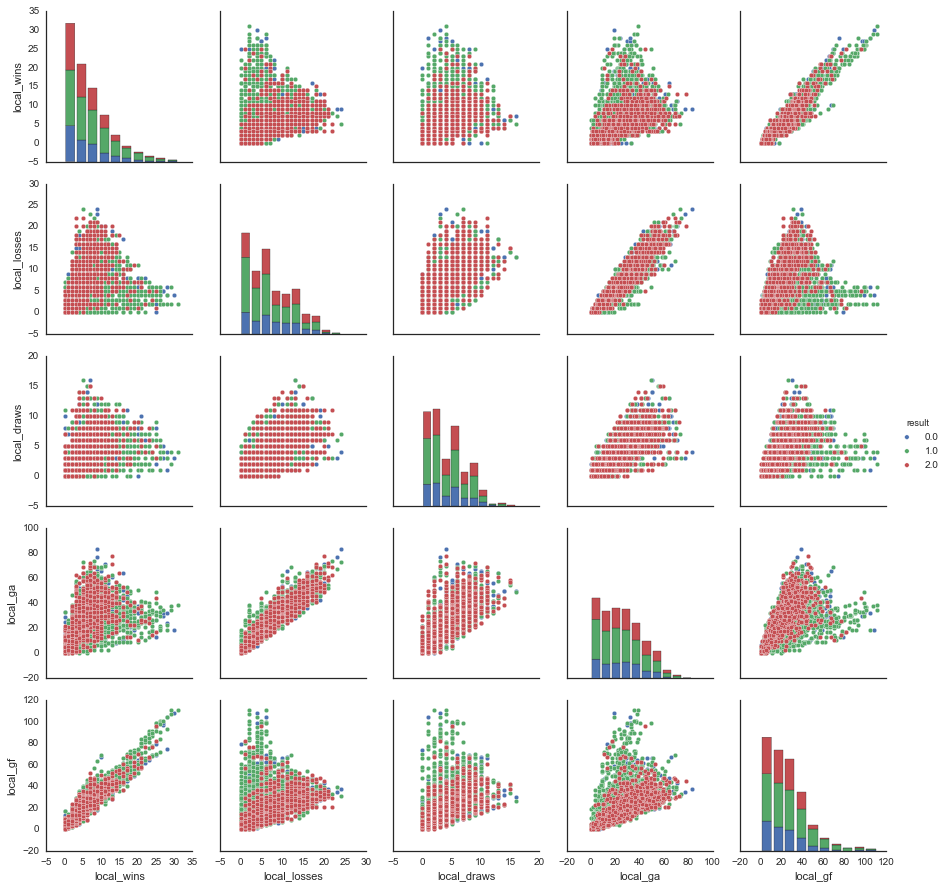

In [11]:
# Plot de les dades, observem les distrucións (ens fixem sempre en la variable 'result' que es el nostre objectiu)
sb.pairplot(full_data_set.dropna(), vars=[ 'local_wins',
            'local_losses',
            'local_draws',
            'local_ga',
            'local_gf'], hue='result')

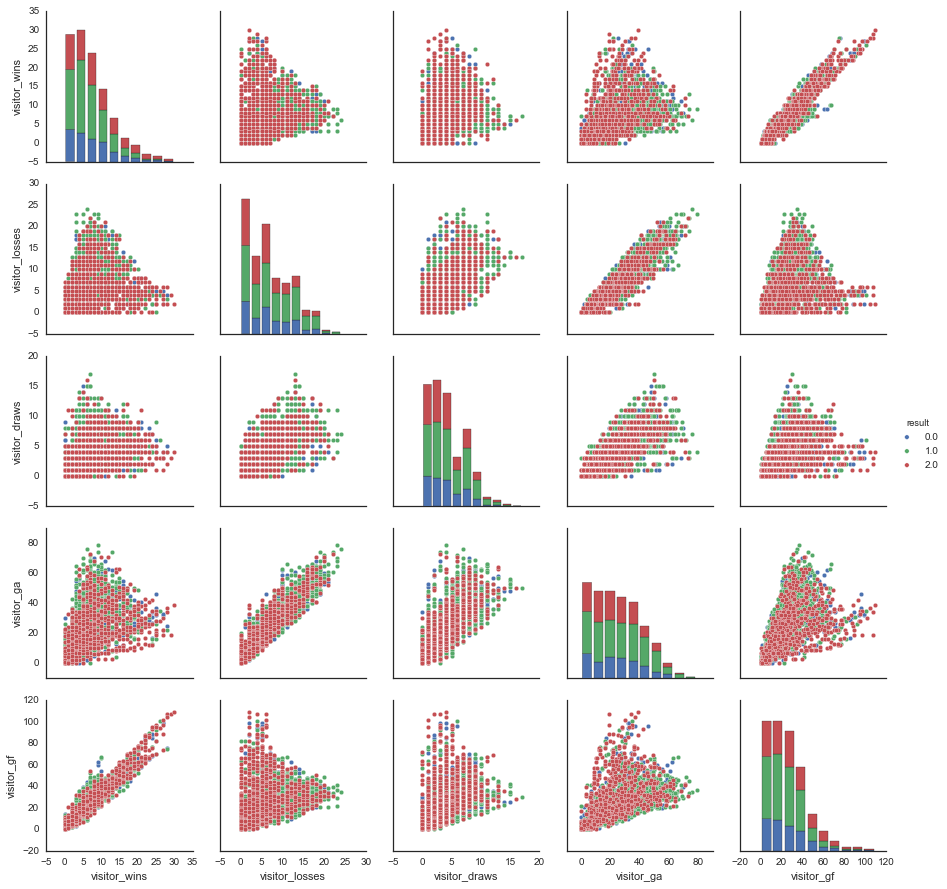

In [11]:
# Plot de les dades, observem les distrucións (ens fixem sempre en la variable 'result' que es el nostre objectiu)
sb.pairplot(full_data_set.dropna(), vars=[ 'visitor_wins',
            'visitor_losses',
            'visitor_draws',
            'visitor_ga',
            'visitor_gf'], hue='result')

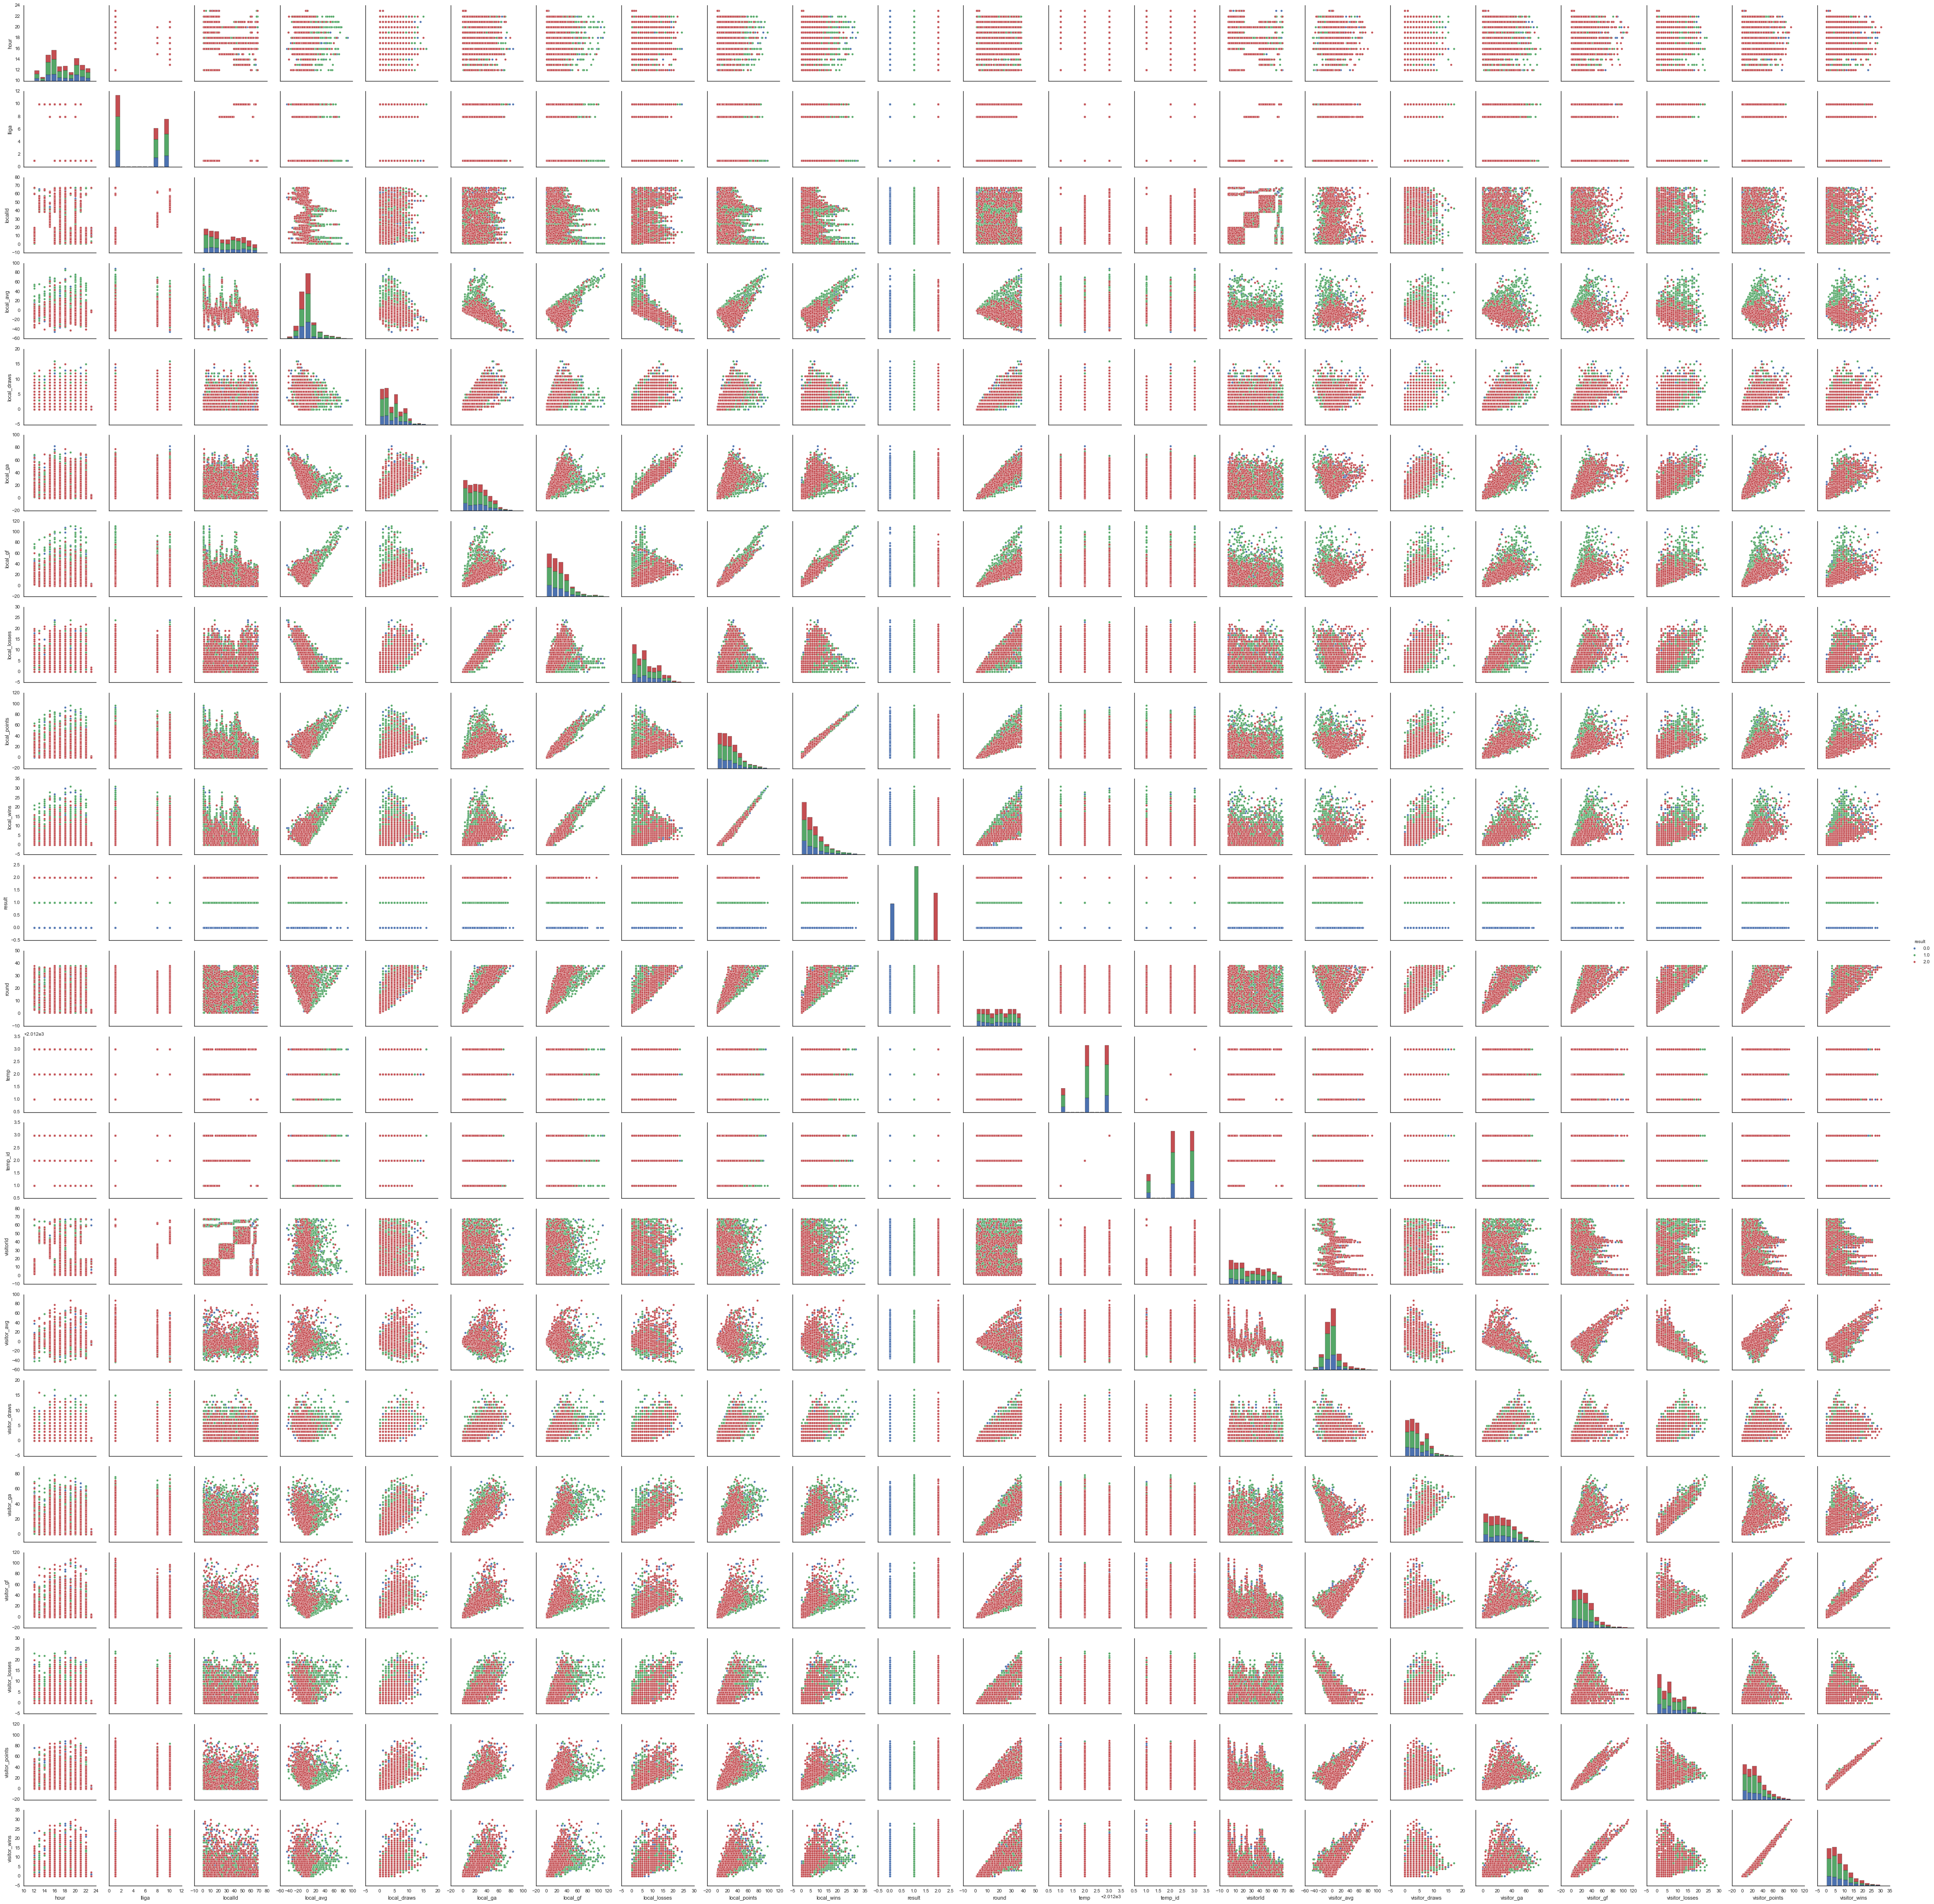

In [12]:
# Plot de les dades, observem les distrucións (ens fixem sempre en la variable 'result' que es el nostre objectiu)
sb.pairplot(full_data_set.dropna(), hue='result')

Tal com veiem als grafics resultants i les taules de descripció, els maxims i minims de les dades no están gaire allunyats. Per tant, les nostres dades no están gaire disperses i no haurem d'escalar cap feature a la norma.


In [ ]:
#Exemple de normalització
#X_normalized = preprocessing.normalize(X, norm='l2')

## Construcció i análisis de resultats dels Models

In [11]:
# Definim la colmna objectiu (que volem predir)
y_name = 'result'
feature_names = full_data_set.columns.tolist()
feature_names.remove(y_name)

# Separem el data set entre totes les dades, i els resultats
X = full_data_set[feature_names]
y = full_data_set[y_name]

### Separem entre train i test  

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(X, y, train_size=0.75, stratify=y)

### Decision TREE

In [13]:
from sklearn.tree import DecisionTreeClassifier
# Creem el classificador
decision_tree_classifier = DecisionTreeClassifier()

# Entrenem amb el training
decision_tree_classifier.fit(training_inputs, training_classes)

# Validem amb el test i mesurem resultats
dt_score = decision_tree_classifier.score(testing_inputs, testing_classes)
dt_mse = mean_squared_error(testing_classes, decision_tree_classifier.predict(testing_inputs))
print "Decision Tree Score: %.4f"  % dt_score, "\nMSE: %.4f" % dt_mse 

Decision Tree Score: 0.4134 
MSE: 1.0445


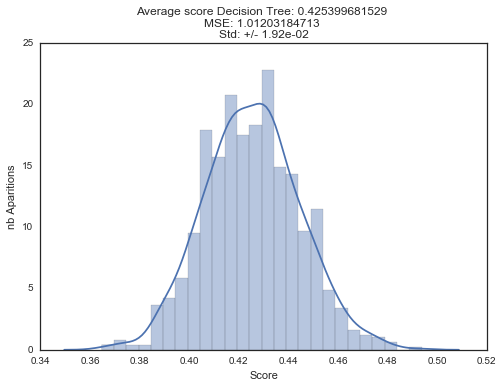

In [14]:
dt_scores = []
dt_mses = []

#Fem el mateix peró amb diversos subsets training/test (hauria de sortir una distribució normal)
for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    dt_score = decision_tree_classifier.score(testing_inputs, testing_classes)
    dt_mse = mean_squared_error(testing_classes, decision_tree_classifier.predict(testing_inputs))
    dt_scores.append(dt_score)
    dt_mses.append(dt_mse)
    
plt.title('Average score Decision Tree: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(dt_scores),  np.mean(dt_mses), np.std(dt_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(dt_scores)

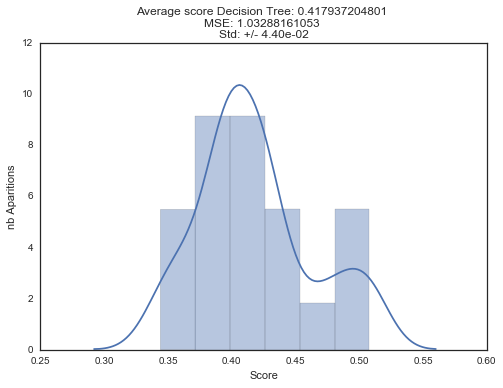

In [15]:
#Enlloc d'utilitzar training i test, provem crossvalidation 
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
dt_scores = cross_val_score(decision_tree_classifier, X, y, cv=20)
dt_mses = cross_val_score(decision_tree_classifier, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score Decision Tree: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(dt_scores), -np.mean(dt_mses), np.std(dt_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(dt_scores)

In [68]:
decision_tree_classifier.get_params().keys()

['presort',
 'splitter',
 'max_leaf_nodes',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'max_features',
 'max_depth',
 'class_weight']

In [69]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada'
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()


parameter_grid = {'max_depth': list(range(1,10)),
                  'max_features': list(range(1,21))}

cross_validation = StratifiedKFold(y, n_folds=20)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           n_jobs=4)

grid_search.fit(X, y)
print('Best score Decision Tree: {}'.format(grid_search.best_score_))
print('Best parameters Decision Tree: {}'.format(grid_search.best_params_))

Best score Decision Tree: 0.537051792829
Best parameters Decision Tree: {'max_features': 20, 'max_depth': 4}


### KNN

#### Faig el mateix procés que abans però amb aquest metode

In [47]:
from sklearn import neighbors

# Creem el classificador
knn = neighbors.KNeighborsClassifier(n_neighbors=80, weights='distance')

# Entrenem amb el training
knn.fit(training_inputs, training_classes)

# Validem amb el test i mesurem resultats
knn_score = knn.score(testing_inputs, testing_classes)
knn_mse = mean_squared_error(testing_classes, knn.predict(testing_inputs))
print "Decision Tree Score: %.4f"  % knn_score, "\nMSE: %.4f" % knn_mse 

Decision Tree Score: 0.5127 
MSE: 0.6545


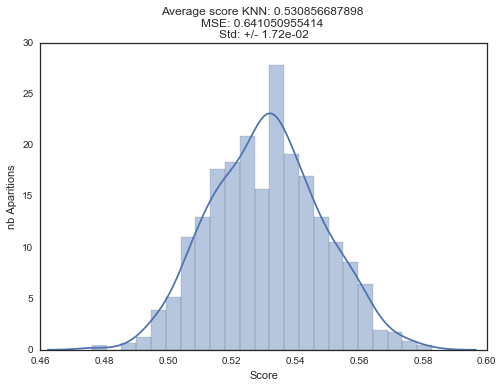

In [57]:
knn_scores = []
knn_mses = []

#Fem el mateix peró amb diversos subsets training/test (hauria de sortir una distribució normal)
for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    knn = neighbors.KNeighborsClassifier(n_neighbors= 80, weights= 'distance')
    knn.fit(training_inputs, training_classes)
    knn_score = knn.score(testing_inputs, testing_classes)
    knn_mse = mean_squared_error(testing_classes, knn.predict(testing_inputs))
    knn_scores.append(knn_score)
    knn_mses.append(knn_mse)
    
plt.title('Average score KNN: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(knn_scores),  np.mean(knn_mses), np.std(knn_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(knn_scores)

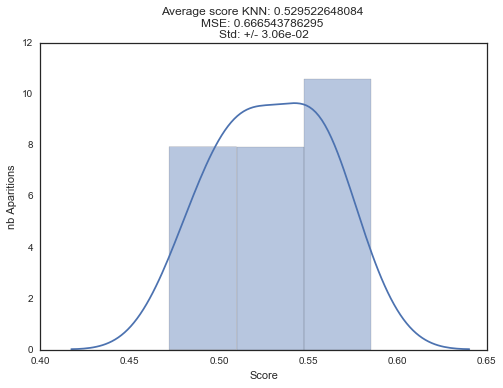

In [58]:
from sklearn.cross_validation import cross_val_score

#Enlloc d'utilitzar training i test, provem crossvalidation 
knn = neighbors.KNeighborsClassifier(n_neighbors= 80, weights= 'distance')

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
knn_scores = cross_val_score(knn, X, y, cv=20)
knn_mses = cross_val_score(knn, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score KNN: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(knn_scores), -np.mean(knn_mses), np.std(knn_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(knn_scores)

In [73]:
knn.get_params().keys()

['n_neighbors',
 'n_jobs',
 'algorithm',
 'metric',
 'metric_params',
 'p',
 'weights',
 'leaf_size']

In [74]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

knn = neighbors.KNeighborsClassifier()

parameter_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


cross_validation = StratifiedKFold(y, n_folds=20)

grid_search = GridSearchCV(knn,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           n_jobs=4)

grid_search.fit(X, y)
print('Best score KNN: {}'.format(grid_search.best_score_))
print('Best parameters KNN: {}'.format(grid_search.best_params_))

Best score KNN: 0.529482071713
Best parameters KNN: {'n_neighbors': 80, 'weights': 'distance'}


### SVM

In [51]:
from sklearn import svm

svmc = svm.SVC(kernel='rbf', C=1, gamma=0.0001)

svmc.fit(training_inputs, training_classes)

svmc_score = svmc.score(testing_inputs, testing_classes)
svmc_mse = mean_squared_error(testing_classes, svmc.predict(testing_inputs))
print "Support Vector Machine: %.4f"  % svmc_score, "\nMSE: %.4f" % svmc_mse 

Support Vector Machine: 0.5175 
MSE: 0.6210


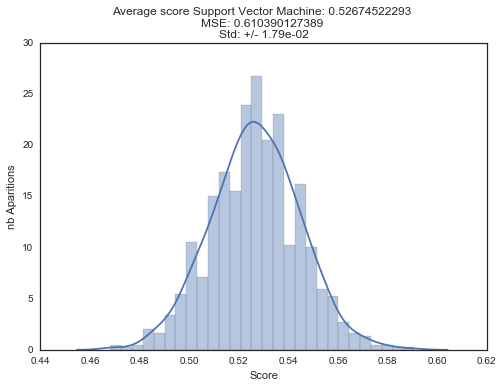

In [59]:
svmc_scores = []
svmc_mses = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    svmc = svm.SVC(kernel='rbf', C=1, gamma=0.0001)
    svmc.fit(training_inputs, training_classes)
    svmc_score = svmc.score(testing_inputs, testing_classes)
    svmc_mse = mean_squared_error(testing_classes, svmc.predict(testing_inputs))
    svmc_scores.append(svmc_score)
    svmc_mses.append(svmc_mse)
    
plt.title('Average score Support Vector Machine: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(svmc_scores),  np.mean(svmc_mses), np.std(svmc_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(svmc_scores)

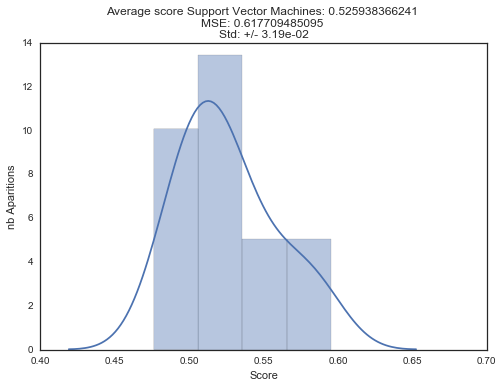

In [60]:
from sklearn.cross_validation import cross_val_score

svmc = svm.SVC(kernel='rbf', C=1, gamma=0.0001)

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
svmc_scores = cross_val_score(svmc, X, y, cv=20)
svmc_mses = cross_val_score(svmc, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score Support Vector Machines: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(svmc_scores), -np.mean(svmc_mses), np.std(svmc_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(svmc_scores)

In [78]:
clf.get_params().keys()

['kernel',
 'C',
 'verbose',
 'probability',
 'degree',
 'shrinking',
 'max_iter',
 'decision_function_shape',
 'random_state',
 'tol',
 'cache_size',
 'coef0',
 'gamma',
 'class_weight']

In [79]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

clf = svm.SVC()

parameter_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}

cross_validation = StratifiedKFold(y, n_folds=20)

grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           n_jobs=4)

grid_search.fit(X, y)
print('Best score SVM: {}'.format(grid_search.best_score_))
print('Best parameters SVM: {}'.format(grid_search.best_params_))

Best score SVM: 0.525896414343
Best parameters SVM: {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}


### Logistic Regression

In [63]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(C=1e8)
    
logistic.fit(training_inputs, training_classes) 

lr_score = logistic.score(testing_inputs, testing_classes)
lr_mse = mean_squared_error(testing_classes, logistic.predict(testing_inputs))
print "Logistic regression Score: %.4f"  % lr_score, "\nMSE: %.4f" % lr_mse 

Logistic regression Score: 0.5159 
MSE: 0.6608


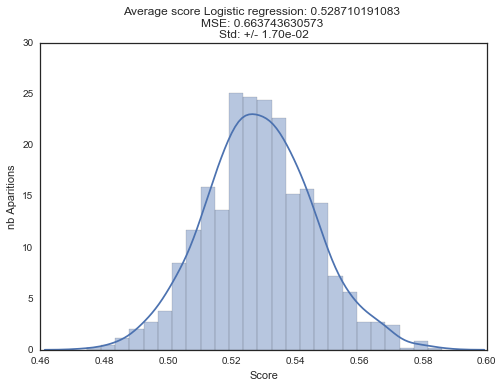

In [61]:
lr_scores = []
lr_mses = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    logistic = linear_model.LogisticRegression(C=1e8)
    logistic.fit(training_inputs, training_classes)
    lr_score = logistic.score(testing_inputs, testing_classes)
    lr_mse = mean_squared_error(testing_classes, logistic.predict(testing_inputs))
    lr_scores.append(lr_score)
    lr_mses.append(lr_mse)
    
plt.title('Average score Logistic regression: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(lr_scores),  np.mean(lr_mses), np.std(lr_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(lr_scores)

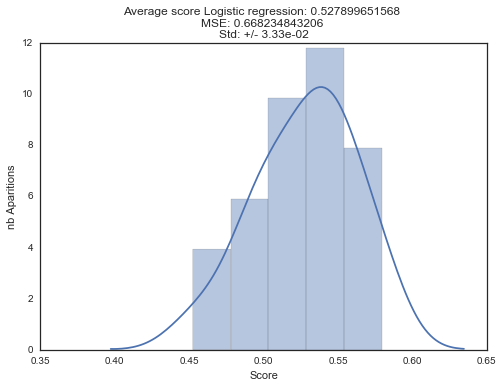

In [64]:
from sklearn.cross_validation import cross_val_score

logistic = linear_model.LogisticRegression(C=1e8)

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
lr_scores = cross_val_score(logistic, X, y, cv=20)
lr_mses = cross_val_score(logistic, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score Logistic regression: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(lr_scores), -np.mean(lr_mses), np.std(lr_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(lr_scores)

In [83]:
logistic.get_params().keys()

['warm_start',
 'C',
 'n_jobs',
 'verbose',
 'intercept_scaling',
 'fit_intercept',
 'max_iter',
 'penalty',
 'multi_class',
 'random_state',
 'dual',
 'tol',
 'solver',
 'class_weight']

In [84]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

logistic = linear_model.LogisticRegression()

parameter_grid = {'C': numpy.linspace(0.01,1000,100)},

cross_validation = StratifiedKFold(y, n_folds=20)

grid_search = GridSearchCV(logistic,
                           param_grid=parameter_grid,
                           cv=cross_validation
                           )

grid_search.fit(X, y)
print('Best score Logistic Regression: {}'.format(grid_search.best_score_))
print('Best parameters Logistic Regression: {}'.format(grid_search.best_params_))

Best score Logistic Regression: 0.530677290837
Best parameters Logistic Regression: {'C': 868.68818181818187}


#### No hem aconseguit cap resultat espectacular. Fem unes quantes proves més.

## Multiples proves

Model scores
ada_boost     0.519934
bagging       0.477614
extra_tree    0.477976
forest        0.474775
gaussian      0.494093
grad_boost    0.525903
passive       0.375140
ridge         0.529909
sgd           0.415685
tree          0.405916
xgboost       0.531506
dtype: float64


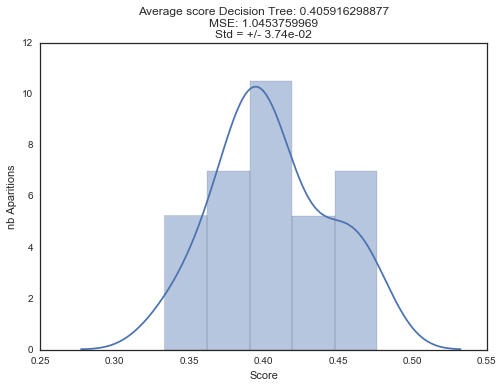

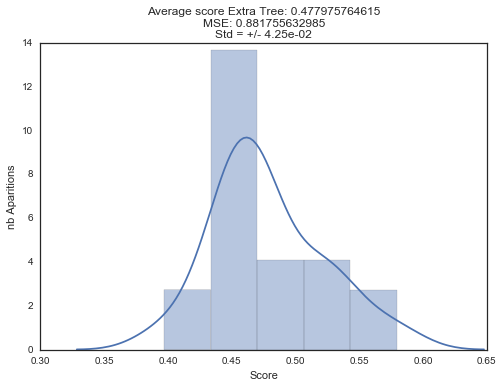

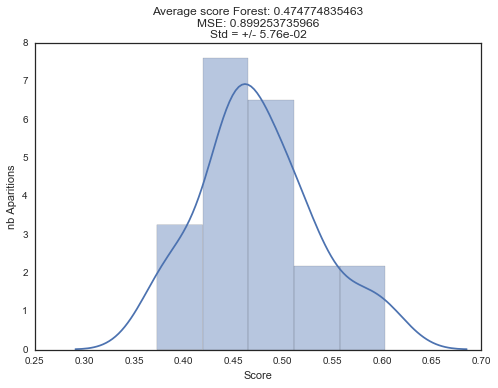

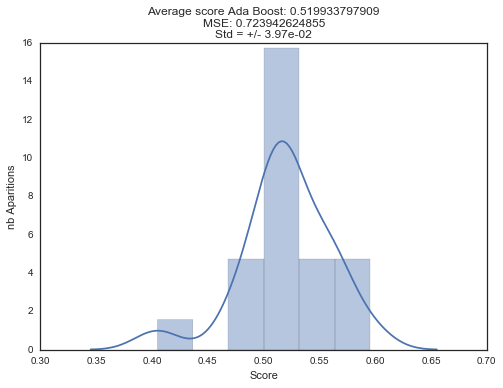

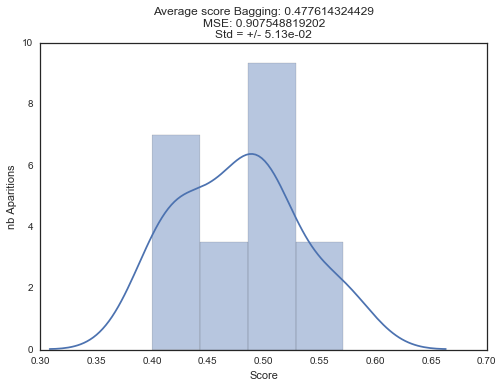

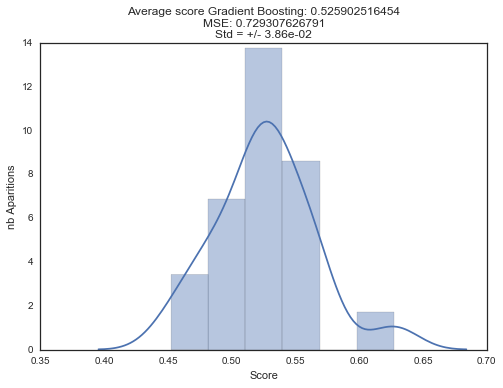

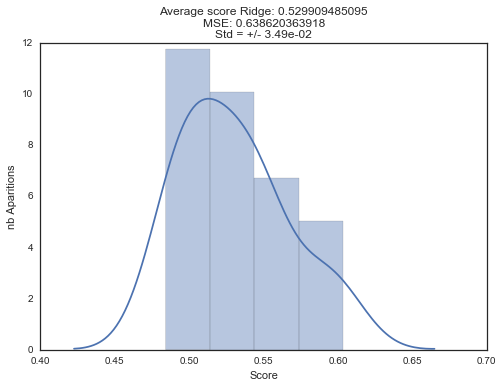

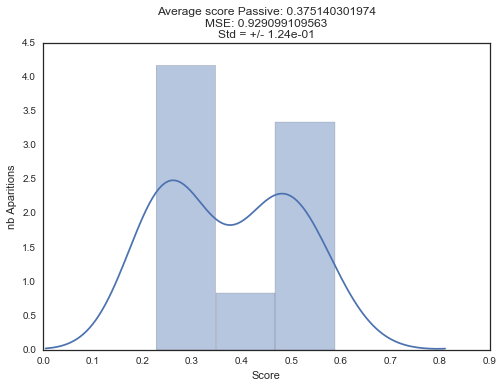

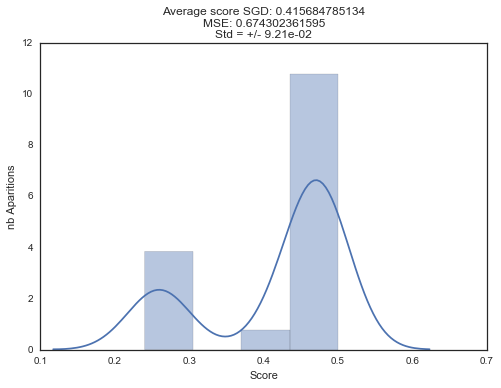

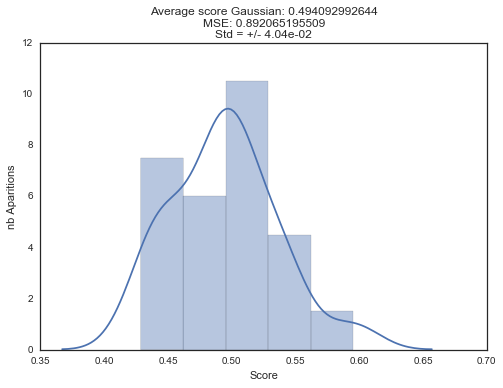

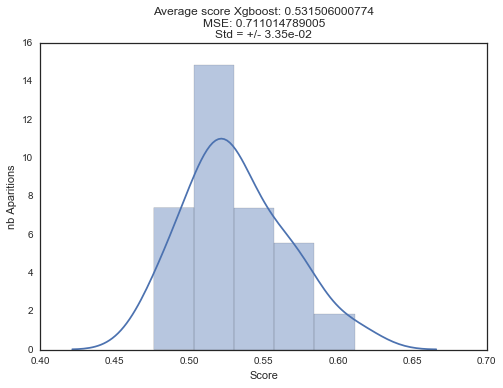

In [14]:
from sklearn import cross_validation as cv
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model 
from sklearn import naive_bayes 
import xgboost as xgb

skf = cv.StratifiedKFold(y, n_folds=20, shuffle=True)
scores = {}
mses = {}

def score_model(model):
    return cv.cross_val_score(model, X, y, cv=skf, n_jobs=4)

def mse_model(model):
    return cv.cross_val_score(model, X, y, cv=skf, n_jobs=4, scoring='mean_squared_error')

#Decision Tree
scores['tree'] = score_model(tree.DecisionTreeClassifier()) 
mses['tree'] = mse_model(tree.DecisionTreeClassifier())
plt.figure()
sb.distplot(scores['tree'])
plt.title('Average score Decision Tree: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['tree']), -np.mean(mses['tree']), np.std(scores['tree'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

#Extra Tree
scores['extra_tree'] = score_model(ensemble.ExtraTreesClassifier())
mses['extra_tree'] = mse_model(ensemble.ExtraTreesClassifier())
plt.figure()
sb.distplot(scores['extra_tree'])
plt.title('Average score Extra Tree: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['extra_tree']), -np.mean(mses['extra_tree']), np.std(scores['extra_tree'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['forest'] = score_model(ensemble.RandomForestClassifier())
mses['forest'] = mse_model(ensemble.RandomForestClassifier())
plt.figure()
sb.distplot(scores['forest'])
plt.title('Average score Forest: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['forest']), -np.mean(mses['forest']), np.std(scores['forest'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['ada_boost'] = score_model(ensemble.AdaBoostClassifier())
mses['ada_boost'] = mse_model(ensemble.AdaBoostClassifier())
plt.figure()
sb.distplot(scores['ada_boost'])
plt.title('Average score Ada Boost: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['ada_boost']), -np.mean(mses['ada_boost']), np.std(scores['ada_boost'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['bagging'] = score_model(ensemble.BaggingClassifier())
mses['bagging'] = mse_model(ensemble.BaggingClassifier())
plt.figure()
sb.distplot(scores['bagging'])
plt.title('Average score Bagging: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['bagging']), -np.mean(mses['bagging']), np.std(scores['bagging'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['grad_boost'] = score_model(ensemble.GradientBoostingClassifier())
mses['grad_boost'] = mse_model(ensemble.GradientBoostingClassifier())
plt.figure()
sb.distplot(scores['grad_boost'])
plt.title('Average score Gradient Boosting: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['grad_boost']), -np.mean(mses['grad_boost']), np.std(scores['grad_boost'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['ridge'] = score_model(linear_model.RidgeClassifier())
mses['ridge'] = mse_model(linear_model.RidgeClassifier())
plt.figure()
sb.distplot(scores['ridge'])
plt.title('Average score Ridge: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['ridge']), -np.mean(mses['ridge']), np.std(scores['ridge'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['passive'] = score_model(linear_model.PassiveAggressiveClassifier())
mses['passive'] = mse_model(linear_model.PassiveAggressiveClassifier())
plt.figure()
sb.distplot(scores['passive'])
plt.title('Average score Passive: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['passive']), -np.mean(mses['passive']), np.std(scores['passive'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['sgd'] = score_model(linear_model.SGDClassifier())
mses['sgd'] = mse_model(linear_model.SGDClassifier())
plt.figure()
sb.distplot(scores['sgd'])
plt.title('Average score SGD: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['sgd']), -np.mean(mses['sgd']), np.std(scores['sgd'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['gaussian'] = score_model(naive_bayes.GaussianNB())
mses['gaussian'] = mse_model(naive_bayes.GaussianNB())
plt.figure()
sb.distplot(scores['gaussian'])
plt.title('Average score Gaussian: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['gaussian']), -np.mean(mses['gaussian']), np.std(scores['gaussian'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

scores['xgboost'] = score_model(xgb.XGBClassifier())
mses['xgboost'] = mse_model(xgb.XGBClassifier())
plt.figure()
sb.distplot(scores['xgboost'])
plt.title('Average score Xgboost: {}\nMSE: {}\nStd = +/- {:.2e}'.format(
        np.mean(scores['xgboost']), -np.mean(mses['xgboost']), np.std(scores['xgboost'])))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

# Print the scores
model_scores = pd.DataFrame(scores).mean()

print('Model scores\n{}'.format(model_scores))

#### Xgboost? Internet diu que potser va bé

### XGBOOST

In [33]:
import xgboost as xgb

xgbo = xgb.XGBClassifier()

xgbo.fit(training_inputs, training_classes,  eval_metric="auc")

xgbo_score = xgbo.score(testing_inputs, testing_classes)
xgbo_mse = mean_squared_error(testing_classes, xgbo.predict(testing_inputs))
print "XGBOOST Score: %.4f"  % xgbo_score, "\nMSE: %.4f" % xgbo_mse 

XGBOOST Score: 0.5350 
MSE: 0.7420


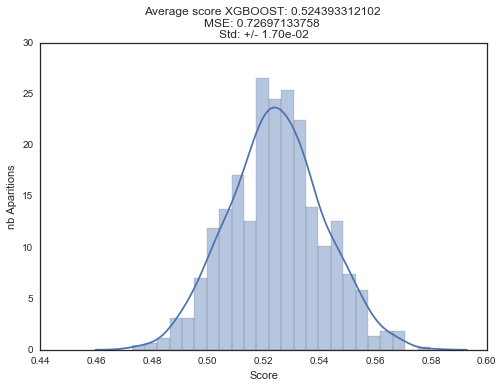

In [34]:
xgbo_scores = []
xgbo_mses = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X, y, train_size=0.75)
    
    xgbo.fit(training_inputs, training_classes)
    xgbo_score = xgbo.score(testing_inputs, testing_classes)
    xgbo_mse = mean_squared_error(testing_classes, xgbo.predict(testing_inputs))
    xgbo_scores.append(xgbo_score)
    xgbo_mses.append(xgbo_mse)

    
plt.title('Average score XGBOOST: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(xgbo_scores),  np.mean(xgbo_mses), np.std(xgbo_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(xgbo_scores)

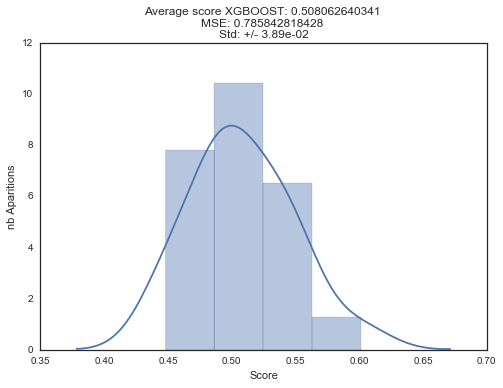

In [35]:
from sklearn.cross_validation import cross_val_score

#Al igual que abans, hauria de retornar una distribució normal (utilitzo X i y directament!)
xgbo_scores = cross_val_score(xgbo, X, y, cv=20)
xgbo_mses = cross_val_score(xgbo, X, y, cv=20, scoring='mean_squared_error')

plt.title('Average score XGBOOST: {} \nMSE: {} \nStd: +/- {:.2e}'.format(
        np.mean(xgbo_scores), -np.mean(xgbo_mses), np.std(xgbo_scores)))
plt.ylabel('nb Aparitions')
plt.xlabel('Score')

sb.distplot(xgbo_scores)

In [88]:
xgbo.get_params().keys()

['reg_alpha',
 'colsample_bytree',
 'silent',
 'colsample_bylevel',
 'scale_pos_weight',
 'learning_rate',
 'missing',
 'max_delta_step',
 'nthread',
 'base_score',
 'n_estimators',
 'subsample',
 'reg_lambda',
 'seed',
 'min_child_weight',
 'objective',
 'max_depth',
 'gamma']

In [1]:
#Probem un algoritme que ajuda a decidir els millors parametres d'entrada
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

xgbo = xgb.XGBClassifier()

parameter_grid = {
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [5, 6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0], 
    'n_estimators': [100,200,400,500,1000]
}


cross_validation = StratifiedKFold(y, n_folds=2)

grid_search = GridSearchCV(xgbo,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           verbose=10)

grid_search.fit(X, y)
print('Best score XGBOOST: {}'.format(grid_search.best_score_))
print('Best parameters XGBOOST: {}'.format(grid_search.best_params_))

#Resultats (per no embrutar la sortida)
#Best score XGBOOST: 0.490836653386
#Best parameters XGBOOST: {'n_estimators': 100, 'subsample': 0.9, 'learning_rate': 0.05, 'colsample_bytree': 0.9, 'max_depth': 5}

NameError: name 'xgb' is not defined

## Conclusions preliminars

#### De moment tenim problemes, ja que els metodes que hem provat de mitja no donen ni tan sols una puntuació del gaire alta.... 
#### Provarem amb noves features i a veure que ens surt